In [2]:
import os
import sys
os.chdir('/home/msun415/induction/')
import pickle
from src.config import METHOD, DATASET, GRAMMAR
import importlib
from src.examples import *
from src.draw.color import to_hex, CMAP
from src.draw.graph import draw_graph
from src.config import RADIUS
from argparse import ArgumentParser
import pickle
from src.grammar.common import get_args
from src.grammar.ednce import *
from src.draw.graph import *
from src.api.get_motifs import *
from src.algo.utils import *
from src.algo.common import *
from src.grammar.common import *
from src.grammar.utils import *
from src.algo.ednce import terminate, dfs
from src.model import graph_regression, transformer_regression
from argparse import ArgumentParser
from networkx.algorithms.isomorphism import DiGraphMatcher
import pdb

/home/msun415/miniforge3/envs/ckt/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


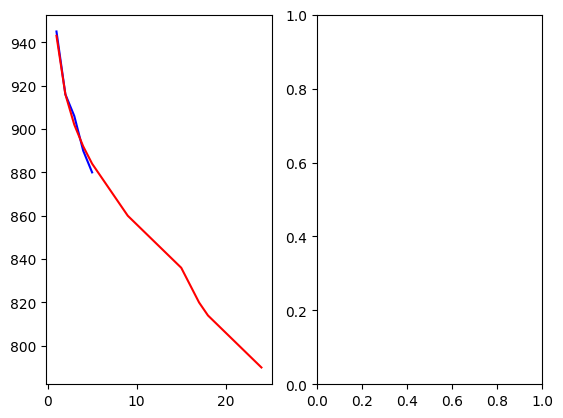

In [18]:
%matplotlib inline
def plot_run(last_run, ax, **kwargs):
    lines = open('/home/msun415/induction/data/api_ckt_ednce.log').readlines()
    occurs = re.findall('graph at iter (\d+) has (\d+) nodes', '\n'.join(lines))
    start_inds = [i for i in range(len(occurs)) if occurs[i][0] == '1']
    index_start = start_inds[-last_run]
    index_end = start_inds[-(last_run-1)] if last_run > 1 else len(occurs)
    ax.plot([int(i) for i, _ in occurs[index_start:index_end]], [int(num) for _, num in occurs[index_start:index_end]], **kwargs)

plt.close('all')
fig, axes = plt.subplots(1, 2)
plot_run(1, axes[0], c='blue')
plot_run(2, axes[0], c='red')
